# Beat the casino!

Let's play a game. We will roll a dice - if the value of 1 comes up you win, if 2, 3, 4, 5 or 6 turn up the house wins. Before rolling you bet a certain amount of money, if you win you double your bet, if you lose, you lose it all. Would you play and for how long?

Let's make a monte carlo sequence that simulates the game and see how much money you have left after N turns at the game.

To begin assume:
1. number of games played = 5
2. You start with £1,000 each
3. Each time you play you must bet £80

Fill out this information below:

In [14]:
number_of_games_played= 5
amount_bet_per_game= 80
total_funds= 1000

Now we need to make a function which rolls the dice. This function will have no inputs but will return "True" if you win and "False" if you lose (look above to see your win conditions).

Fill out the function below generating an appropriate random number for each roll of the dice:

In [15]:
import numpy as np

def roll():
    '''This is a function which rolls the dice'''
    dice_roll = np.random.randint(1,7)
    if dice_roll == 1:
        return True
    else:
        return False

Now lets make a function which plays the game. This function is written below but with 6 bugs - find and correct them.

Bugs are:

1.   Funds needs square brackets
2.   Final_funds needs initalising with square brackets
3.   less than or equals to in while loop to make the game play the number of times you want (since starting at 1 rather than 0)
4.   if you win, the wager amount is doubled rather than simply added to total funds
5.   Funds.append.(total_funds) has one too many dots
6.   it's += not =+, initally written as infinate loop.



In [16]:
import matplotlib.pyplot as plt

def play(total_funds, wager_amount, total_plays):
    '''This is a function which plays the game'''

    Play_num = []
    Funds = []
    play = 1
    Final_funds = []

    while play <= total_plays:
        if roll():
            total_funds = total_funds + 2*wager_amount
            Play_num.append(play)
            Funds.append(total_funds)
        else:
            total_funds = total_funds - wager_amount
            Play_num.append(play)
            Funds.append(total_funds)

        play += 1

    plt.plot(Play_num,Funds)
    Final_funds.append(Funds[-1])
    return(Final_funds)

Play the game above and take a look at the plot results via a histogram of your total funds at the end (label your axes appropriately). How many bets until, on average, you loose all your money? Note: your function play() will play one realisation of the game - in an MC simulation we are simulating many realisations to find a good approximation to the full disitribution of results. Try running 1000 realisations.

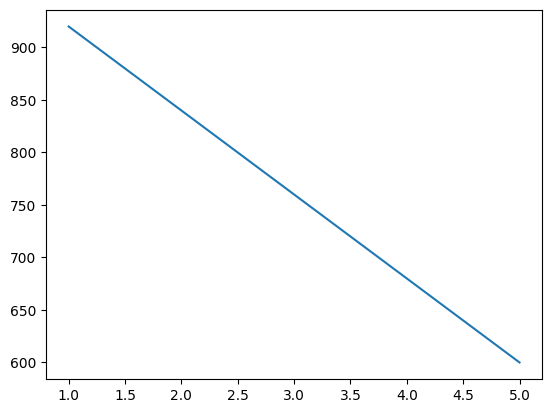

In [17]:
final_fund = play(total_funds, amount_bet_per_game, number_of_games_played)

The average total funds drops below zero after 26 plays


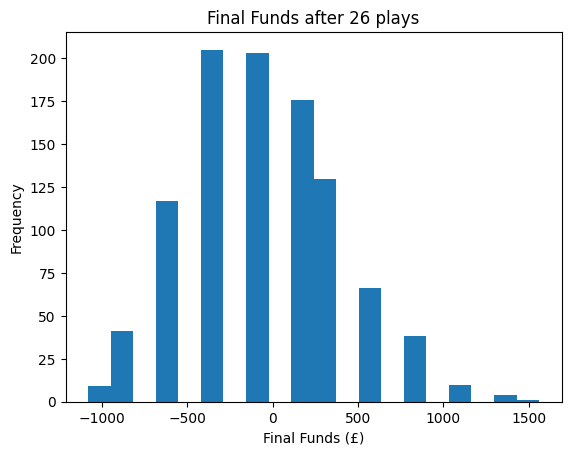

In [10]:
# MC simulation
num_sims = 1000

# Simulate up to 100 plays at a time
for i in range(1,100):
  number_of_games_played = i
  # Important to reset final funds in each loop
  final_funds_all = []
  for j in range(num_sims):
    final_funds_all.extend(play(total_funds, amount_bet_per_game, number_of_games_played))
  # When the average final funds drops below 0 then stop simulation
  if np.mean(final_funds_all) < 0:
    break

plt.figure()
plt.hist(final_funds_all, bins=20)
plt.xlabel('Final Funds (£)')
plt.ylabel('Frequency')
plt.title('Final Funds after %s plays' % (number_of_games_played))

print('The average total funds drops below zero after %s plays' % (number_of_games_played))